# In-depth Analysis (Applying Machine Learning)

## Step 1) Read the Manual

Before we progress further, we display the information about the dataset that we obtained from the dataset manual, that is, from Kaggle and the UCI Machine Learning Repository.

From Kaggle, an overview of the variables:

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) default.payment.next.month: Default payment (1=yes, 0=no)

And from UCI:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year). 
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

Potential issue: We'll want to group values 5 and 6 for Education into one value (looking at the Kaggle description) since they both stand for "unknown". And perhaps we'll want to include 4 in that grouping since it has the value of "others".

## Step 2) Review the Data Types

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random
import sklearn

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
filename = 'UCI_Credit_Card.csv'

In [3]:
data = pd.read_csv(filename, index_col=0)

In [4]:
pd.set_option('display.max_columns', 500)
data.sample(5).transpose()

ID,6719,25463,5039,24696,14178
LIMIT_BAL,200000.0,50000.0,20000.0,280000.0,360000.0
SEX,2.0,2.0,1.0,1.0,2.0
EDUCATION,2.0,2.0,1.0,2.0,2.0
MARRIAGE,2.0,2.0,2.0,1.0,2.0
AGE,29.0,23.0,28.0,31.0,25.0
PAY_0,0.0,0.0,0.0,0.0,-1.0
PAY_2,0.0,0.0,-1.0,0.0,-1.0
PAY_3,2.0,0.0,-1.0,0.0,-1.0
PAY_4,0.0,-2.0,-1.0,0.0,-1.0
PAY_5,0.0,-2.0,0.0,0.0,-1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6                     30000 non-null float64
PAY_AMT1  

All columns in this dataset have a numeric type. They are either float-valued (continuous) or int-valued (discrete). Nothing seems to be off, so we may continue.

In [6]:
display(data.shape)

(30000, 24)

## Step 3) Fixing the Issues (Data Cleaning):

#### Problem 1: Get rid of Bad Column Names


In [7]:
## Rename columns
data.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'}, inplace=True)

#### Problem 2: Replace Negative Values with 0 in Pay_X columns

To deal with with values for the PAY_X columns, a sensible solution is to convert all non-positive values to 0. The dataset description says that a value of -1 means "pay duly" and positive values represent a payment delay by that number of months. Therefore, converting -1 and -2 values to 0, and having 0 represent "pay duly" is logical.

In [8]:
for i in range(1,7):
    data.loc[data["PAY_" + str(i)] < 0, "PAY_" + str(i)] = 0

#### Problem 3: Get rid of Values of 0 for Marriage

A logical move is to group the 0 values with the "Other" values, coded as 3, so that is what we'll do:


In [9]:
data.loc[data["MARRIAGE"] == 0, 'MARRIAGE'] = 3

"Other" for marriage can possibly refer to divorced, widowed, seperated, etc.

#### Problem 4: Get rid of 0 Values for Education

Currently coded as:
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

We see that 0 is not even in the dataset desciption, and we have 2 values for unknown. So a logical move is to convert the 0, 5 and 6 values to 4, which is what we'll do. "Other" can  refer to education less than high school or perhaps vocational training.

In [10]:
replace = (data["EDUCATION"] == 0) | (data["EDUCATION"] == 5) | (data["EDUCATION"] == 6) 
data.loc[replace,'EDUCATION'] = 4

## Step 4) Analysis

### Supervised Learning

#### Preprocessing

Now need to deal with SEX, EDUCATION, and MARRIAGE appropriately.

In [11]:
# replace_map = {'SEX': {1:"Male", 2:"Female"}, 'EDUCATION': {1: "Grad School", 2: "University", 3:"High School", 4:"Other"}, 'MARRIAGE': {1:"Married", 2:"Single", 3:"Other"}}
# data.replace(replace_map, inplace=True)

In [12]:
# # Changed

# data['default'] = data['default'].astype('category') 
# #Convert default variable from int64 to categorical variable

# data = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE'], prefix=['SEX', 'EDUCATION', 'MARRIAGE'])

# # Not import because will just use X and y
# col_at_end = ['default']
# data = data[[column for column in data if column not in col_at_end] + [column for column in col_at_end if column in data]]
# ## Put default column at the end of the dataframe

# # Don't use Pandas categoricals
# data['PAY_1'] = data.PAY_1.astype('category')
# data['PAY_2'] = data.PAY_2.astype('category')
# data['PAY_3'] = data.PAY_3.astype('category')
# data['PAY_4'] = data.PAY_4.astype('category')
# data['PAY_5'] = data.PAY_5.astype('category')
# data['PAY_6'] = data.PAY_6.astype('category')


In [13]:
# data = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE'], prefix=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)
# switch this to sklearn OneHotEncoder later

Let's examine the PAY_X columns now:

In [14]:
df = data[['PAY_6', 'PAY_5', 'BILL_AMT6', 'PAY_AMT6']]
df.columns = ['Repayment status in April', 'Repayment status in May', 'Amount of bill statement in April', 'Amount of previous payment in April']

In [15]:
df.loc[(df['Amount of bill statement in April'] < df['Amount of previous payment in April']) & (df['Repayment status in April'] < df['Repayment status in May'])].head()

,Repayment status in April,Repayment status in May,Amount of bill statement in April,Amount of previous payment in April
ID,,,,
69,0,2,7319.0,13899.0
437,0,2,150.0,200.0
1876,0,2,107495.0,116880.0
2263,0,2,39819.0,223833.0
2273,0,2,244.0,856.0


Represent instances where our repayment status is **worse** and we've paid more than our bill.

Should I convert the PAY_X variables to 0/1? Maybe see what kind of accuracy we get with each, then decide.

##### Steps Involved in Classification in Scikit-Learn

1. Preprocess Data
2. Create Train and Test Sets
3. Instantiate the model/estimator  
(Steps 1 and 3 can be combined in a Pipeline object)
4. Specify Hyperparameter Space
5. Instantiate GridSearchCV or RandomizedSearchCV objects
6. Fit CV object to the Training Set
7. Predict on the Test Set
8. Compute Scores for the Model

*Models*:
1. Logistic Regression (LR)
2. K-Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Trees (DT)

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import time

###### Step 1) Preprocess Data

In [17]:
# We will train our classifier with the following features:
# Numeric features to be scaled: LIMIT_BAL, AGE, PAY_X, BIL_AMTX, and PAY_AMTX
# Categorical features: SEX, EDUCATION, MARRIAGE

In [18]:
# We create the preprocessing pipelines for both numeric and categorical data
numeric_features = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data['PAY_1'] = data.PAY_1.astype('float64')
data['PAY_2'] = data.PAY_2.astype('float64')
data['PAY_3'] = data.PAY_3.astype('float64')
data['PAY_4'] = data.PAY_4.astype('float64')
data['PAY_5'] = data.PAY_5.astype('float64')
data['PAY_6'] = data.PAY_6.astype('float64')
data['AGE'] = data.AGE.astype('float64')

# data['default'] = data.default.astype('float64')
# data['SEX'] = data.SEX.astype('float64')
# data['EDUCATION'] = data.EDUCATION.astype('float64')
# data['MARRIAGE'] = data.MARRIAGE.astype('float64')


numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

In [19]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categories='auto'))
])

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

###### Step 2) Split Data into Training and Test Sets

In [21]:
y = data['default']#.values
X = data.drop('default', axis=1)#.values

Why does this not work with .values?

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

###### Step 3: Instantiate the Estimator

*Logistic Regression*

In [ ]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', LogisticRegression(solver='liblinear'))])

###### Step 4: Specify the Hyperparameter Space

In [ ]:
param_grid_lr = {
    'classifier__C': np.logspace(-5, 8, 15)
}

###### Step 5: Instantiate the CV Object

In [ ]:
lr_cv = GridSearchCV(lr, param_grid_lr, cv=10, iid=False)

###### Step 6: Fit on Training

In [ ]:
lr_cv.fit(X_train, y_train)

###### Step 7: Predict on Test

In [ ]:
y_pred_lr = lr_cv.predict(X_test)

###### Step 8: Scoring

**Best score and parameters**

**Accuracy**

In [ ]:
lr_cv.score(X_test, y_test)

*Best parameters*

In [ ]:
print("mean cross-validated score of the best_estimator: %.3f " % lr_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: C =", lr_cv.best_params_.get('classifier__C'))

**Classification Report**

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**ROC Curve**

In [ ]:
y_pred_prob = lr_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)

In [ ]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

*Area under the Curve*

In [ ]:
roc_auc_score(y_test, y_pred_prob)

In [ ]:
cv_scores = cross_val_score(lr_cv, X, y, cv=5, scoring='roc_auc')
cv_scores

###### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
#3
knn = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', KNeighborsClassifier())])
#4
param_grid_knn = {
    'classifier__n_neighbors': np.arange(1,20)
}

#5
knn_cv = RandomizedSearchCV(knn, param_grid_knn, cv=5, iid=False)

#6
t0 = time.time()
knn_cv.fit(X_train, y_train)
t1 = time.time()
print(t1 - t0)
# takes 307 seconds with 5 folds, 1 to 20 neighbors,

#7
y_pred_knn = knn_cv.predict(X_test)

309.29000544548035
0.805


In [25]:
#8
print("Accuracy with KNN is: ", knn_cv.score(X_test, y_test))

Accuracy with KNN is:  0.805


In [27]:
print("mean cross-validated score of the best_estimator: %.3f " % knn_cv.best_score_)
print("Parameter setting that gave the best results on the hold out data: n_neighbors =", knn_cv.best_params_.get('classifier__n_neighbors'))

mean cross-validated score of the best_estimator: 0.807 
Parameter setting that gave the best results on the hold out data: n_neighbors = 16


**Classification Report**

In [29]:
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[6691  318]
 [1437  554]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7009
           1       0.64      0.28      0.39      1991

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.78      0.81      0.77      9000



**ROC Curve**

In [30]:
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)

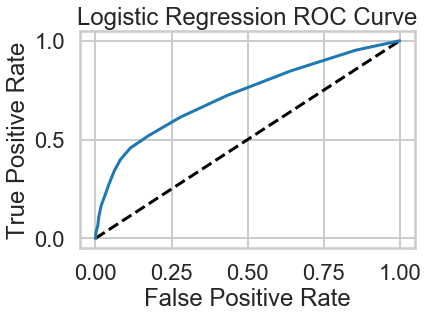

In [31]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

*Area under the Curve*

In [32]:
roc_auc_score(y_test, y_pred_prob)

0.7227674700225778

In [33]:
cv_scores = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')
cv_scores

array([0.71561903, 0.72022768, 0.74318444, 0.7537019 , 0.74764079])

###### SVM

In [36]:
from sklearn.svm import SVC
#3
svm = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', SVC())])
#4
param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.1, 0.01]
}

#5
svm_cv = GridSearchCV(svm, param_grid_svm, cv=5, iid=False)

#6
t0 = time.time()
svm_cv.fit(X_train, y_train)
t1 = time.time()
print("It takes ", t1 - t0, " seconds for SVM fitting")
# takes 580 seconds with 5 folds

#7
y_pred_svm = svm_cv.predict(X_test)

It takes  579.5354518890381  seconds for SVM fitting


In [37]:
#8
print("Accuracy with SVM is: ", svm_cv.score(X_test, y_test))

Accuracy with SVM is:  0.8196666666666667


###### Decision Tree

In [ ]:
# Import necessary modules 
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
#3
dt = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', DecisionTreeClassifier())])
#4
# Setup the parameters and distributions to sample from: param_dist
param_dist_dt = {"max_depth": [3,None],
                 "max_features": randint(1,9),
                 "min_samples_leaf": randint(1,9),
                 "criterion": ["gini", "entropy"]}

#5
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5, iid=False)

#6
t0 = time.time()
dt_cv.fit(X_train, y_train)
t1 = time.time()
print("It takes ", t1 - t0, " seconds for DT fitting")
# takes 307 seconds with 5 folds, 1 to 20 neighbors,

#7
y_pred_svm = dt_cv.predict(X_test)

In [ ]:
#8
print("Accuracy with DT is: ", dt_cv.score(X_test, y_test))

In [ ]:
# Check out LogisticRegressionCV

In [ ]:
# Maybe only use PAY_1 because other columns aren't important?

**Supervised Learning with Scikit Learn - Preprocessing and Pipelines**

Use One-Hot-Encoder in sklearn for SEX, EDUCATION, and MARRIAGE. Use LabelEncoder in sklearn for PAY_X (if need to do something)

*Centering and Scaling*

Hmm, at this point, should I scale the PAY_X columns as well? Might be best to just binarize them. Nope. Gives lower accuracy.

In [ ]:
scaled_features = data.copy()

In [ ]:
col_names = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
             'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
features = scaled_features[col_names]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(features.values)

In [ ]:
features = scaler.transform(features.values)

In [ ]:
scaled_features[col_names] = features

In [ ]:
scaled_features.head()

In [ ]:
y = scaled_features['default'].values
X = scaled_features.drop('default', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_scaled = knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
knn_scaled.score(X_test, y_test)

In [ ]:
parameters = {'n_neighbors': np.arange(1,50)}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(knn, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [ ]:
cv.best_params_

In [ ]:
cv.score(X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Focus on getting it right, so don't use Pipeline now

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# steps = [('scaler', StandardScaler()),
#         ('knn', KNeighborsClassifier())]
# pipeline = Pipeline(steps)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [ ]:
knn_scaled = pipeline.fit(X_train, y_train)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
knn_scaled.score()

In [ ]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

In [ ]:
knn_unscaled.score(X_test, y_test)